# Darvesh Singh Dhillon

### How does someone's Socio-Economic Condition affect their Educational Adaptability? In particular, their Gender, Age, Financial Condition, and Location.

I will be looking at the Age, Gender, Financial Condition, and Location Variables from the Adaptability Dataset. I will be dropping the rest of the columns so I can focus on just the 4 columns I want to compare with the adaptability levels. I will be creating scatterplots with each variable against the adaptability level and compare the slopes of the line(s) of best fit(s). This comparison will show which factor likely affects a person's adaptability level the most. I also want to find a good way to create a weighted score based on the answers provided by students and compared the weighted score for each gender, age, financial condition, and location possibility. If this becomes too much data for me to process for this project, then I may end up dropping a column, most likely the location.

In [ ]:
#all the import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
#importing the dataset using a relative path
adapt = pd.read_csv("../data/raw/adaptability.csv")
adapt

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [ ]:
#drop all extra columns
del adapt['Education Level']
del adapt['Institution Type']
del adapt['IT Student']
del adapt['Load-shedding']

In [ ]:
adapt.rename(columns={'Self Lms': 'Self LMS'}, inplace=True)
#renamed abbreviation to all caps to make it more clear that it is an abbreviation
adapt

,Gender,Age,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
0,Boy,21-25,Yes,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,Yes,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,Yes,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,Yes,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,Yes,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,Yes,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,No,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,Yes,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,No,Mid,Wifi,4G,1-3,No,Mobile,Low


In [ ]:
adapt.head()

,Gender,Age,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
0,Boy,21-25,Yes,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,Yes,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,Yes,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,Yes,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,Yes,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
adapt.shape

(1205, 10)

In [ ]:
adapt.columns

Index(['Gender', 'Age', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self LMS', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [ ]:
adapt.nunique()

Gender                 2
Age                    6
Location               2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self LMS               2
Device                 3
Adaptivity Level       3
dtype: int64

In [ ]:
adapt.apply(lambda col: col.unique())

Gender                                             [Boy, Girl]
Age                    [21-25, 16-20, 11-15, 26-30, 6-10, 1-5]
Location                                             [Yes, No]
Financial Condition                          [Mid, Poor, Rich]
Internet Type                              [Wifi, Mobile Data]
Network Type                                      [4G, 3G, 2G]
Class Duration                                   [3-6, 1-3, 0]
Self LMS                                             [No, Yes]
Device                                 [Tab, Mobile, Computer]
Adaptivity Level                         [Moderate, Low, High]
dtype: object

##### The location is based on whether the student is located in town or not.
##### The LMS refers to whether the institution has its own Learning Management System (LMS) such as Canvas, Moodle, etc.

In [ ]:
adapt.describe()

,Gender,Age,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,2,3,2,3,3,2,3,3
top,Boy,21-25,Yes,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,935,878,695,775,840,995,1013,625


___
## We are now ready to plot the data
___

# Plot 1

In [ ]:
plot1 = adapt[['Adaptivity Level','Gender']]

In [ ]:
plot1[] = adapt['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

In [ ]:
plot1.groupby(["Adaptivity Level", "Gender"])

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_count'

<Axes: xlabel='count', ylabel='Gender'>

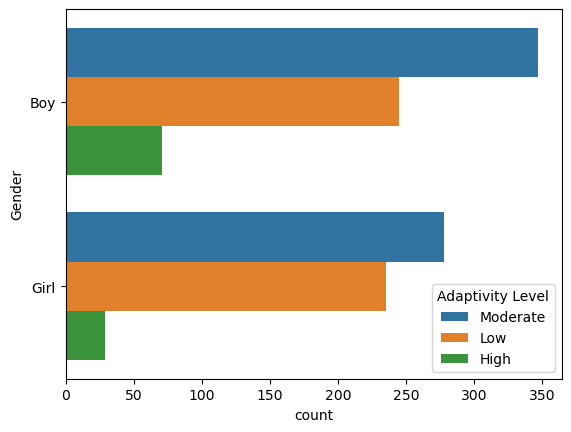

In [ ]:
sns.countplot(data = plot1, y='Gender', hue = "Adaptivity Level")

### Observations
As we can see from this plot, Boys have a higher adaptability level on average 

Aa